In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path

In [3]:
def shape_curve_frame(path: Path):
    df = pd.read_csv(path, index_col=0, header=[0,1]).stack(level=[0,1])
    df.name = 'value'
    df.index.set_names(['epoch', 'set', 'metric'], inplace=True)
    return df.to_frame()

learning_curves = pd.concat(
    {
        (pruning, result_dir.name): shape_curve_frame(result_dir / 'loss.csv')
        for pruning in [3,6,12,24]
        for result_dir in Path(f'../ax_{pruning}_out').iterdir() if result_dir.is_dir()
    },
    names = ['pruning', 'model']
)

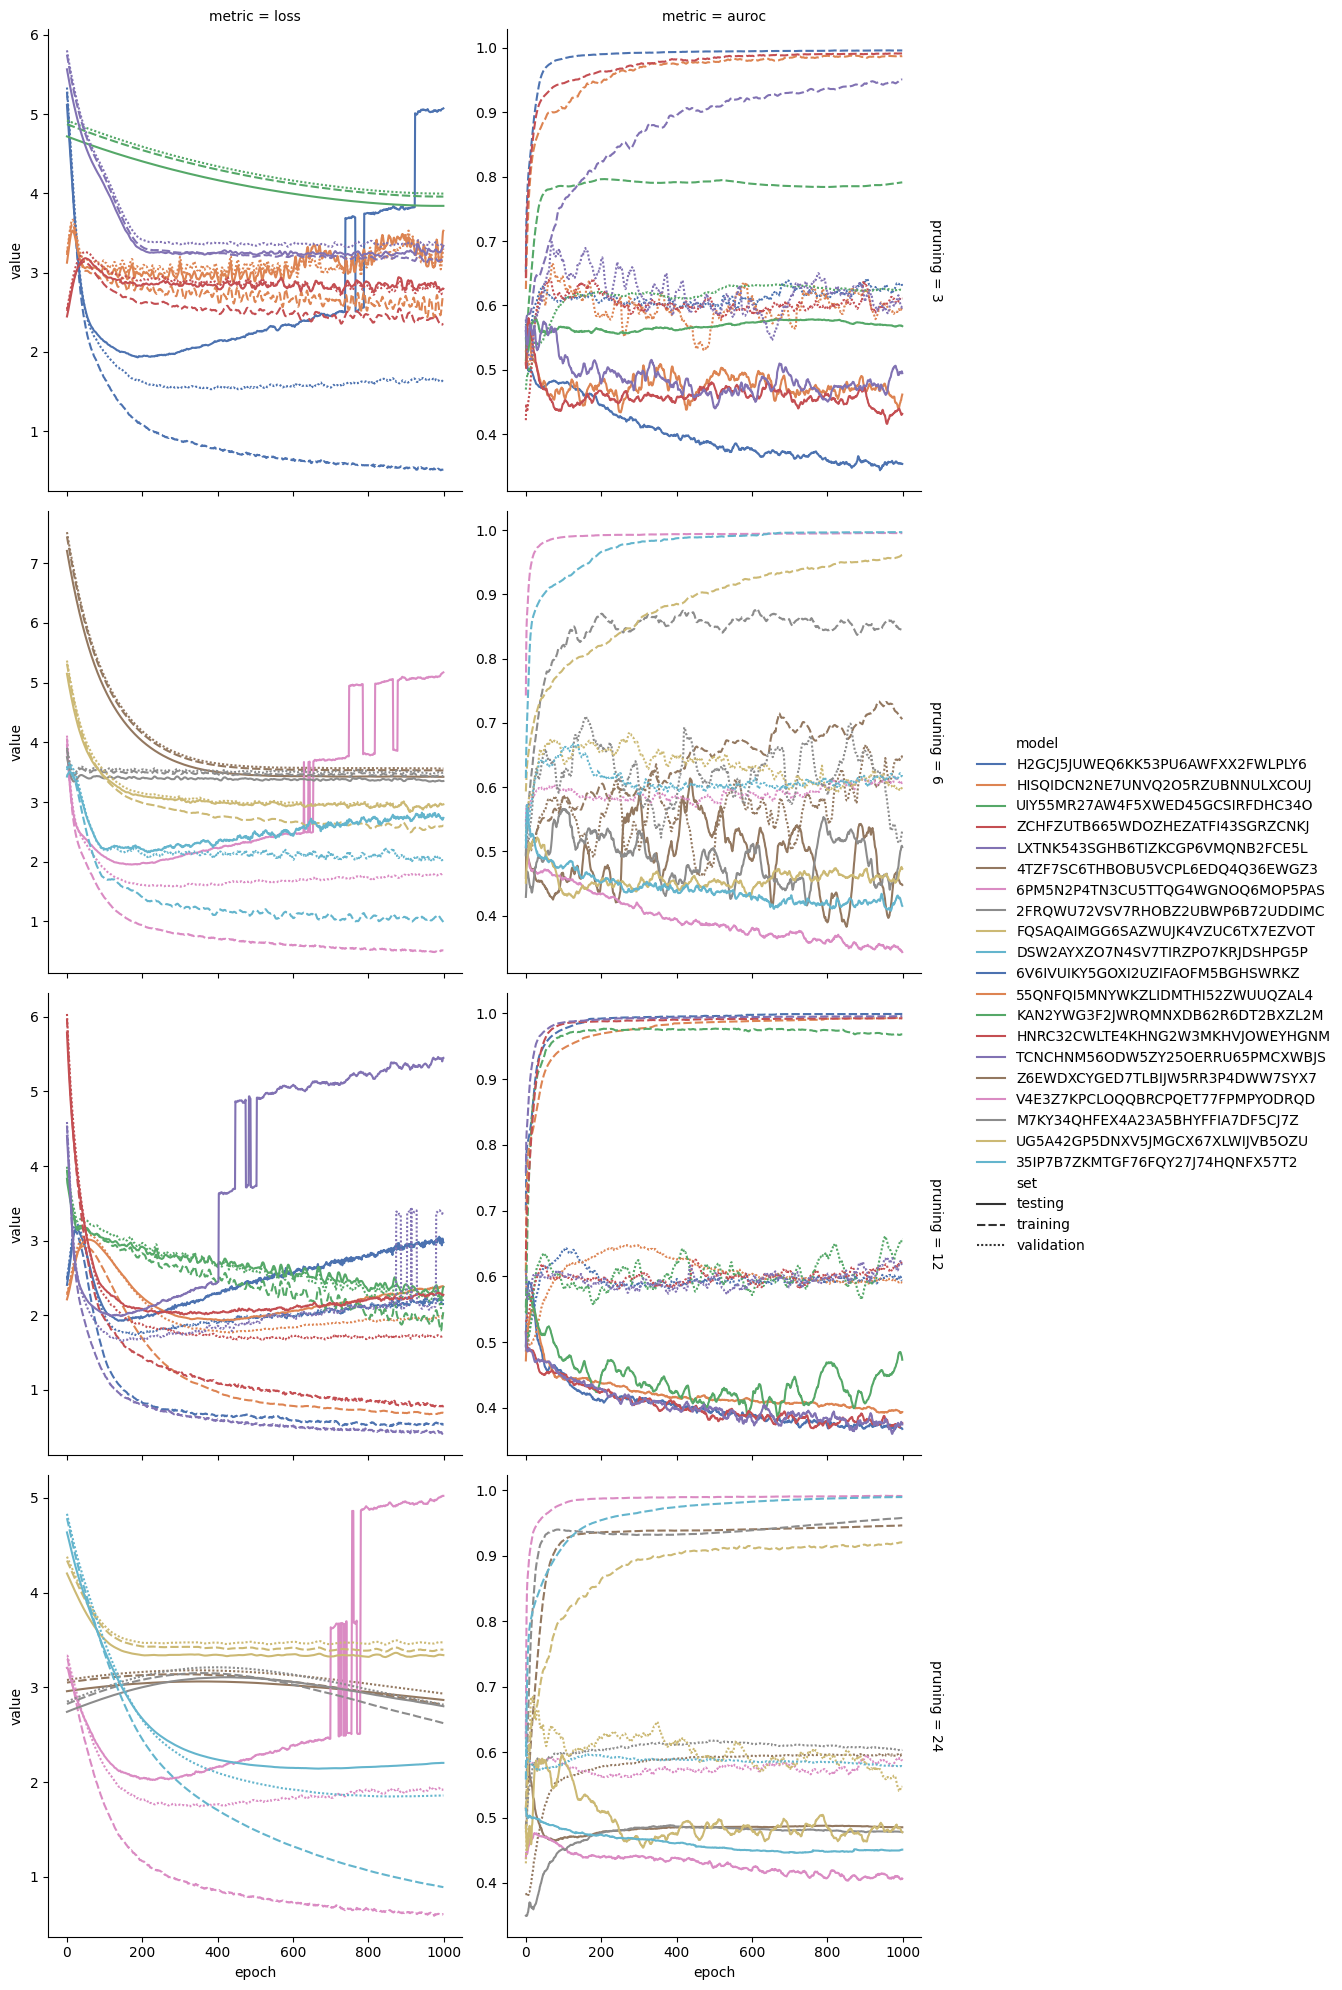

In [6]:
sns.relplot(
    learning_curves,
    x='epoch',
    y='value',
    col='metric',
    row='pruning',
    hue='model',
    palette='deep',
    style='set',
    kind='line',
    facet_kws={'sharey': False, 'margin_titles': True}
)

In [7]:
import json
def read_json(path: Path):
    with path.open('rt') as in_stream:
        return json.load(in_stream)

param_specs = {
    (pruning, param_file.stem): read_json(param_file)
    for pruning in [3,6,12,24]
    for param_file in Path(f'../ax_{pruning}_in').iterdir()
}

In [8]:
pd.DataFrame(param_specs).transpose()

architecture channel_width decoder_depth  \
3  UIY55MR27AW4F5XWED45GCSIRFDHC34O    NNConvNet             1             0   
   HISQIDCN2NE7UNVQ2O5RZUBNNULXCOUJ    NNConvNet             1             0   
   LXTNK543SGHB6TIZKCGP6VMQNB2FCE5L    NNConvNet             1             0   
   ZCHFZUTB665WDOZHEZATFI43SGRZCNKJ    NNConvNet             1             0   
   H2GCJ5JUWEQ6KK53PU6AWFXX2FWLPLY6    NNConvNet             1             0   
6  FQSAQAIMGG6SAZWUJK4VZUC6TX7EZVOT    NNConvNet             1             0   
   4TZF7SC6THBOBU5VCPL6EDQ4Q36EWGZ3    NNConvNet             1             0   
   2FRQWU72VSV7RHOBZ2UBWP6B72UDDIMC    NNConvNet             1             0   
   DSW2AYXZO7N4SV7TIRZPO7KRJDSHPG5P    NNConvNet             1             0   
   6PM5N2P4TN3CU5TTQG4WGNOQ6MOP5PAS    NNConvNet             1             0   
12 HNRC32CWLTE4KHNG2W3MKHVJOWEYHGNM    NNConvNet             1             0   
   55QNFQI5MNYWKZLIDMTHI52ZWUUQZAL4    NNConvNet             1             0   
   KAN2YWG3F2JWRQMNXDB62R6DT2BXZL2M    NNConvNet             1             0   
   TCNCHNM56ODW5ZY25OERRU65PMCXWBJS    NNConvNet             1             0   
   6V6IVUIKY5GOXI2UZIFAOFM5BGHSWRKZ    NNConvNet             1             0   
24 M7KY34QHFEX4A23A5BHYFFIA7DF5CJ7Z    NNConvNet             1             0   
   Z6EWDXCYGED7TLBIJW5RR3P4DWW7SYX7    NNConvNet             1             0   
   35IP7B7ZKMTGF76FQY27J74HQNFX57T2    NNConvNet             1             0   
   UG5A42GP5DNXV5JMGCX67XLWIJVB5OZU    NNConvNet             1             0   
   V4E3Z7KPCLOQQBRCPQET77FPMPYODRQD    NNConvNet             1             0   

                                    dropout_rate encoder_depth gnn_depth  \
3  UIY55MR27AW4F5XWED45GCSIRFDHC34O     0.049857             1         0   
   HISQIDCN2NE7UNVQ2O5RZUBNNULXCOUJ     0.697221             1         0   
   LXTNK543SGHB6TIZKCGP6VMQNB2FCE5L     0.862249             1         0   
   ZCHFZUTB665WDOZHEZATFI43SGRZCNKJ     0.616422             1         0   
   H2GCJ5JUWEQ6KK53PU6AWFXX2FWLPLY6     0.297564             1         0   
6  FQSAQAIMGG6SAZWUJK4VZUC6TX7EZVOT     0.617871             1         0   
   4TZF7SC6THBOBU5VCPL6EDQ4Q36EWGZ3     0.991546             1         0   
   2FRQWU72VSV7RHOBZ2UBWP6B72UDDIMC     0.980735             1         0   
   DSW2AYXZO7N4SV7TIRZPO7KRJDSHPG5P     0.198022             1         0   
   6PM5N2P4TN3CU5TTQG4WGNOQ6MOP5PAS     0.292073             1         0   
12 HNRC32CWLTE4KHNG2W3MKHVJOWEYHGNM     0.499234             1         0   
   55QNFQI5MNYWKZLIDMTHI52ZWUUQZAL4     0.061617             1         0   
   KAN2YWG3F2JWRQMNXDB62R6DT2BXZL2M     0.905756             1         0   
   TCNCHNM56ODW5ZY25OERRU65PMCXWBJS     0.211726             1         0   
   6V6IVUIKY5GOXI2UZIFAOFM5BGHSWRKZ     0.064108             1         0   
24 M7KY34QHFEX4A23A5BHYFFIA7DF5CJ7Z     0.416652             1         0   
   Z6EWDXCYGED7TLBIJW5RR3P4DWW7SYX7     0.151766             1         0   
   35IP7B7ZKMTGF76FQY27J74HQNFX57T2     0.044814             1         0   
   UG5A42GP5DNXV5JMGCX67XLWIJVB5OZU     0.934446             1         0   
   V4E3Z7KPCLOQQBRCPQET77FPMPYODRQD     0.290675             1         0   

                                    learning_rate  
3  UIY55MR27AW4F5XWED45GCSIRFDHC34O       0.00029  
   HISQIDCN2NE7UNVQ2O5RZUBNNULXCOUJ      0.008554  
   LXTNK543SGHB6TIZKCGP6VMQNB2FCE5L      0.005345  
   ZCHFZUTB665WDOZHEZATFI43SGRZCNKJ      0.005441  
   H2GCJ5JUWEQ6KK53PU6AWFXX2FWLPLY6      0.006145  
6  FQSAQAIMGG6SAZWUJK4VZUC6TX7EZVOT      0.004857  
   4TZF7SC6THBOBU5VCPL6EDQ4Q36EWGZ3      0.003987  
   2FRQWU72VSV7RHOBZ2UBWP6B72UDDIMC      0.006845  
   DSW2AYXZO7N4SV7TIRZPO7KRJDSHPG5P      0.007372  
   6PM5N2P4TN3CU5TTQG4WGNOQ6MOP5PAS      0.005278  
12 HNRC32CWLTE4KHNG2W3MKHVJOWEYHGNM       0.00534  
   55QNFQI5MNYWKZLIDMTHI52ZWUUQZAL4      0.003202  
   KAN2YWG3F2JWRQMNXDB62R6DT2BXZL2M      0.004501  
   TCNCHNM56ODW5ZY25OERRU65PMC